In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\abhis\AppData\Local\Temp\ipykernel_6868\1678042603.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["Implied Volatility NR"].isna()).sum() / len(g) * 100)


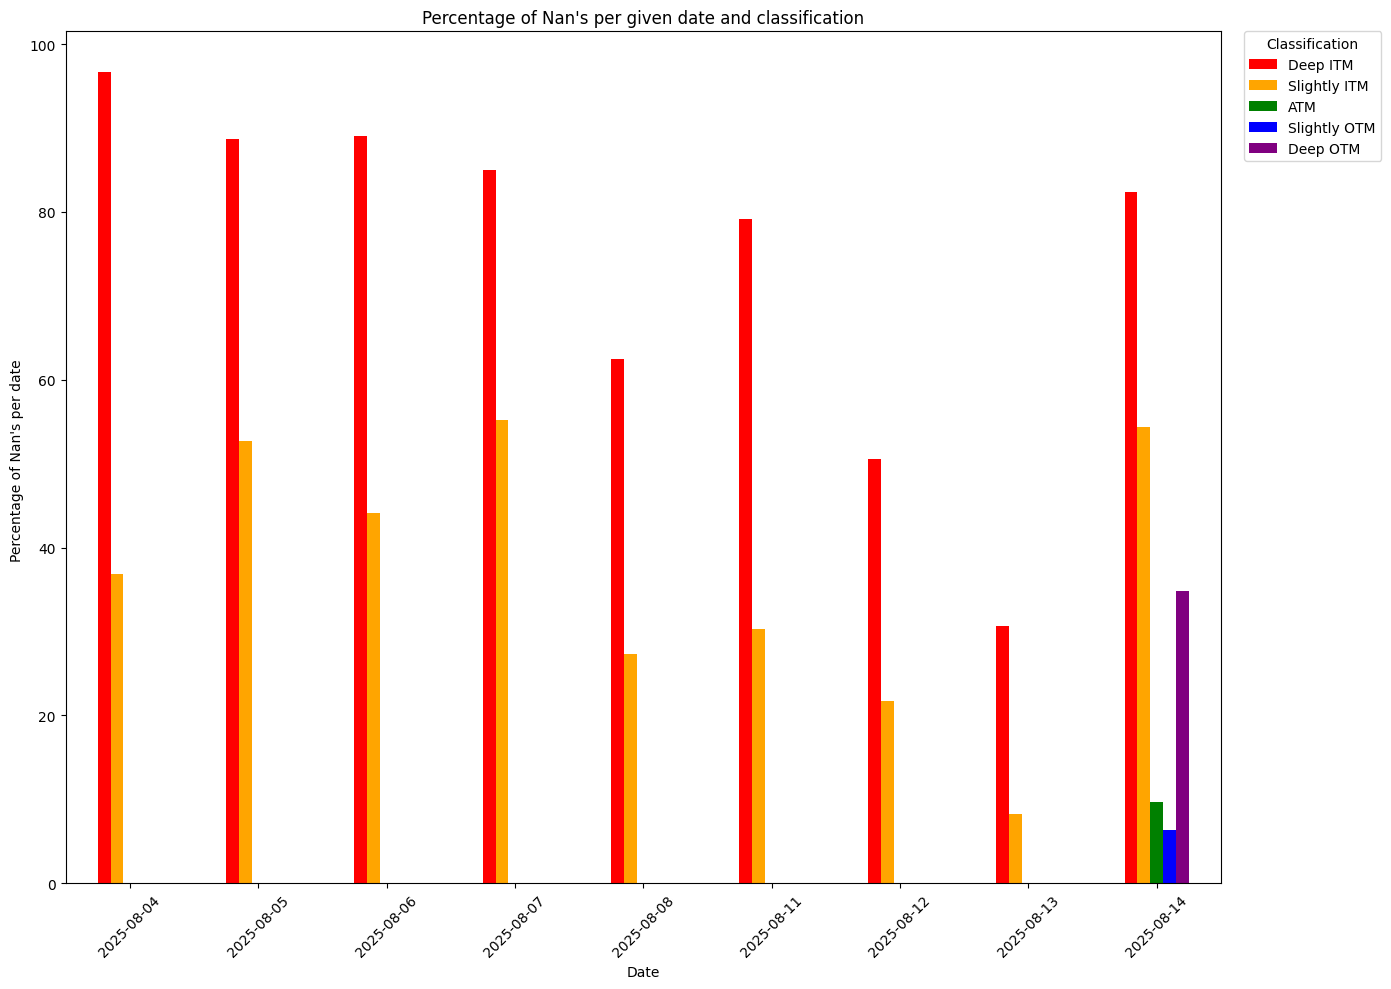

In [2]:
FILE = "Saved Computations for Options Expiry 14-Aug-2025.csv"
old_data=pd.read_csv(FILE,index_col=False);
data=old_data.copy();
data["timestamp"]=pd.to_datetime(data["timestamp"])
data["expiry"]=pd.to_datetime(data["expiry"]);
data["date_only"]=data["timestamp"].dt.date
class_choices = ["Deep ITM", "Slightly ITM", "ATM", "Slightly OTM", "Deep OTM"]

compare_percentage = (
    data.groupby(["date_only", "classification"])
    .apply(lambda g: (g["Implied Volatility NR"].isna()).sum() / len(g) * 100)
    .unstack(fill_value=0)
)

# Recall class_choices = ["Deep ITM", "Slightly ITM", "ATM", "Slightly OTM", "Deep OTM"]
compare_percentage= compare_percentage.reindex(columns=class_choices, fill_value=0)
# Plot grouped bar chart
compare_percentage.plot(
    kind="bar",
    figsize=(14, 10),
    color=["red", "orange", "green", "blue", "purple"]
)

plt.title("Percentage of Nan's per given date and classification")
plt.ylabel("Percentage of Nan's per date ")
plt.xlabel("Date")
plt.xticks(rotation=45)
# Legend outside plot, top right
plt.legend(
    title="Classification",
    loc="upper left", # Why upper left is being displayed on right I don't understand :-P 
    bbox_to_anchor=(1.02, 1),  # shift legend outside
    borderaxespad=0
)
plt.tight_layout()
plt.savefig("Percentage of Nan's per given date and classification.jpg",format="jpg", dpi=300)
plt.show()


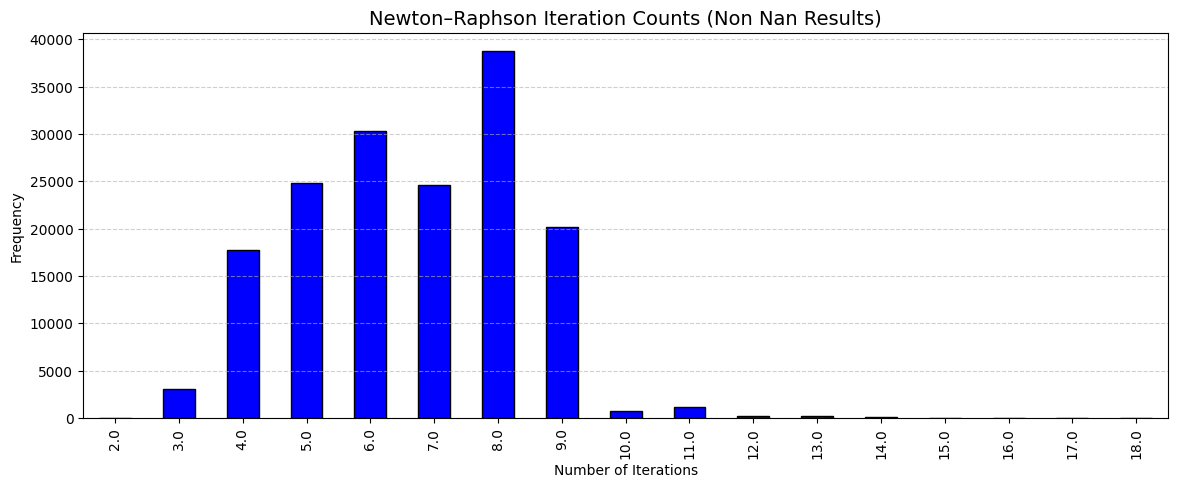

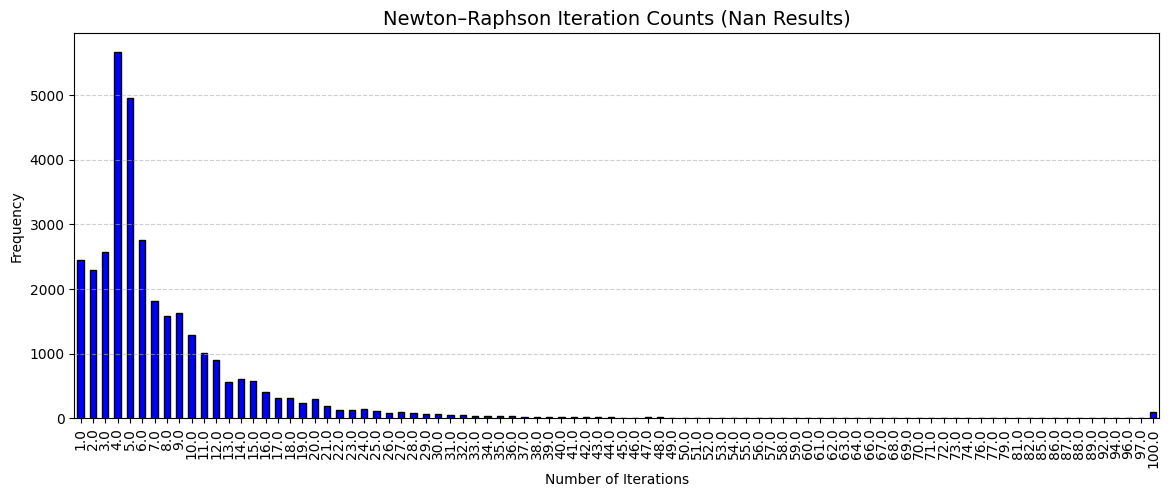

In [3]:
data=old_data.copy()
data=data[data["Implied Volatility NR"].isna()==False] 
plt.figure(figsize=(14, 5))
counts=data["Iterations NR"].value_counts().sort_index() 
counts.plot(kind="bar", color="blue", edgecolor="black")
TITLE="Newton–Raphson Iteration Counts (Non Nan Results)"
plt.title(TITLE, fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # keep iteration numbers readable
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig(TITLE+".jpg",format="jpg", dpi=300)
plt.show()
data=old_data.copy()
data=data[data["Implied Volatility NR"].isna()==True] 
plt.figure(figsize=(14, 5))
counts=data["Iterations NR"].value_counts().sort_index() 
counts.plot(kind="bar", color="blue", edgecolor="black")
TITLE="Newton–Raphson Iteration Counts (Nan Results)"
plt.title(TITLE, fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # keep iteration numbers readable
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.savefig(TITLE+".jpg",format="jpg", dpi=300)
plt.show()